In [11]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('train.csv', index_col=0, parse_dates=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
df.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<AxesSubplot:>

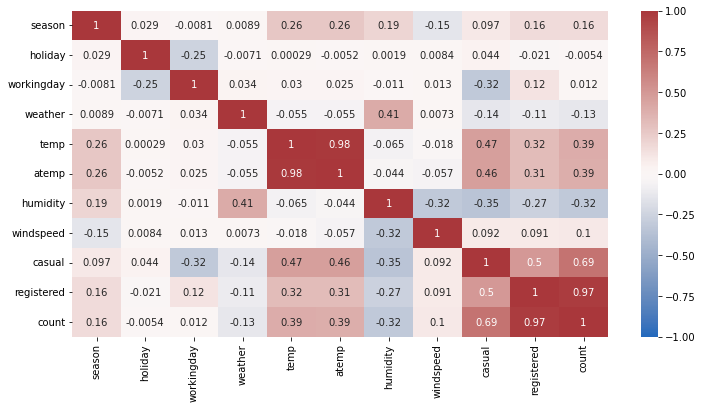

In [13]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1,cmap="vlag",annot_kws={"size":10})

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

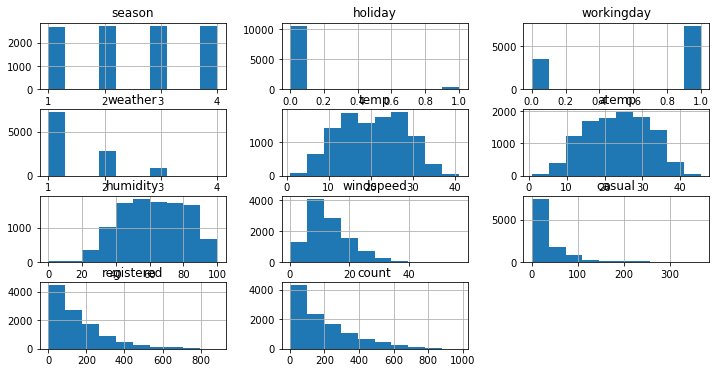

In [14]:
df.hist()

In [15]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### create new feateres - time, day, month, year

In [16]:
df['day'] = df.index.day_name()
column = df.pop('day')
df.insert(0, 'day', column)

df['month'] = df.index.month_name()
column = df.pop('month')
df.insert(1, 'month', column)

df['time'] = df.index.time
column = df.pop('time')
df.insert(0, 'time', column)

df['year'] = df.index.year
column = df.pop('year')
df.insert(3, 'year', column)

df['date'] = df.index.date
column = df.pop('date')
df.insert(0, 'date', column)

df.head()


,date,time,day,month,year,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01,00:00:00,Saturday,January,2011,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,2011-01-01,01:00:00,Saturday,January,2011,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,2011-01-01,02:00:00,Saturday,January,2011,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,2011-01-01,03:00:00,Saturday,January,2011,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,2011-01-01,04:00:00,Saturday,January,2011,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Exploring Time Variables

##### yearly, monthly, daily, hourly Average - By Reg', Cas', Count

In [17]:
# yearly mean - cas', regis' count
a_casual = df['casual'].groupby(df['year']).mean()
a_registered = df['registered'].groupby(df['year']).mean()
a_count = df['count'].groupby(df['year']).mean()

Average_year = pd.concat([a_casual, a_registered, a_count], axis=1)
Average_year

# 1. growth from 2011 to 2012
# 2. difference between casual and registered

,casual,registered,count
year,,,
2011,28.73792,115.485430,144.223349
2012,43.25000,195.310944,238.560944


In [18]:
# monthly mean - cas', regis' count
m_casual = df['casual'].groupby(df['month']).mean()
m_registered = df['registered'].groupby(df['month']).mean()
m_count = df['count'].groupby(df['month']).mean()

Average_month = pd.concat([m_casual, m_registered, m_count], axis=1)
Avergae_month = Average_month.reset_index(inplace=True)
Average_month['numeric_month'] = [4,8,12,2,1,7,6,3,5,11,10,9]
Average_month = Average_month.sort_values('numeric_month')
#Average_month


<AxesSubplot:xlabel='month'>

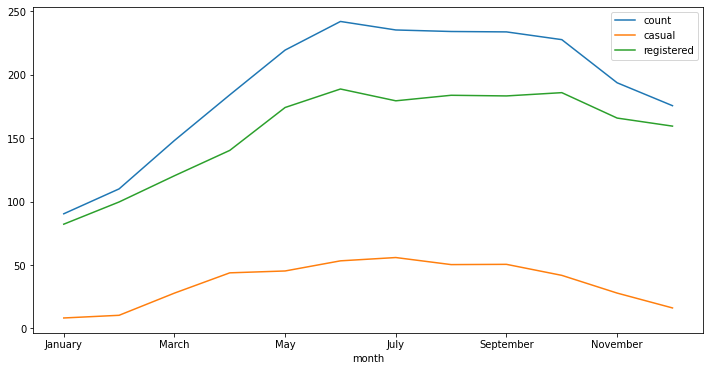

In [19]:
Average_month.plot.line(x='month', y=['count','casual','registered'])

In [20]:
# daily mean - cas', regis' count
d_casual = df['casual'].groupby(df['day']).mean()
d_registered = df['registered'].groupby(df['day']).mean()
d_count = df['count'].groupby(df['day']).mean()

Average_day = pd.concat([d_casual, d_registered, d_count], axis=1)
Average_day = Average_day.reset_index()
Average_day['numeric_day'] = [4,0,5,6,3,1,2]
Average_day = Average_day.sort_values('numeric_day')
#Average_day


<AxesSubplot:xlabel='day'>

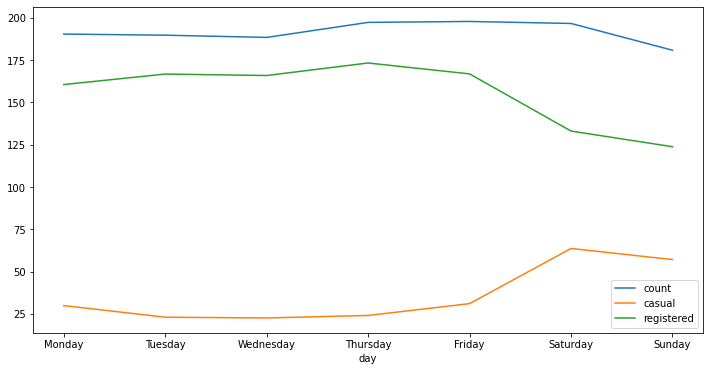

In [21]:
Average_day.plot.line(x='day', y=['count','casual','registered'])

In [22]:
# hourly mean - cas', regis' count
t_casual = df['casual'].groupby(df['time']).mean()
t_registered = df['registered'].groupby(df['time']).mean()
t_count = df['count'].groupby(df['time']).mean()

Average_time = pd.concat([t_casual, t_registered, t_count], axis=1)
Average_time = Average_time.reset_index()
#Average_time.head()

<AxesSubplot:xlabel='time'>

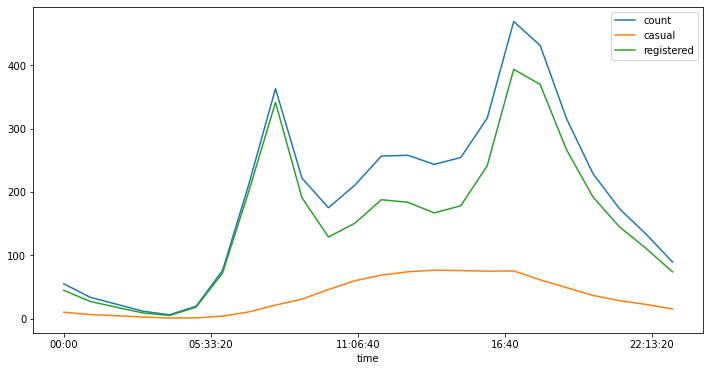

In [23]:
Average_time.plot.line(x='time', y=['count','casual','registered'])

### Explorint Categorical Variables

##### rentals(count,cas,reg)/time of day - woking days Vs non working days

C:\Users\maisa\AppData\Local\Temp/ipykernel_1492/2171851168.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.loc[df['workingday']==1].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)
C:\Users\maisa\AppData\Local\Temp/ipykernel_1492/2171851168.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.loc[df['workingday']==0].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)


<AxesSubplot:xlabel='time'>

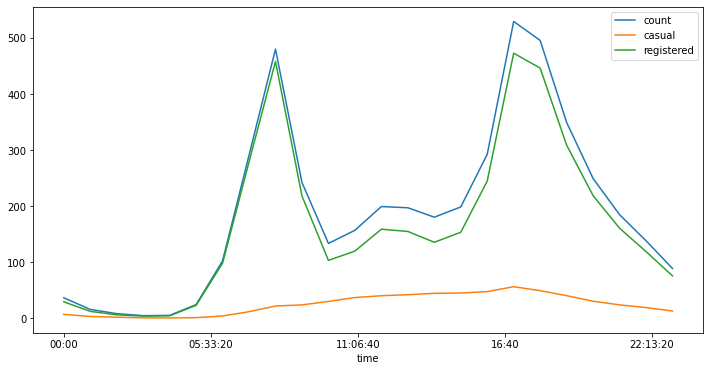

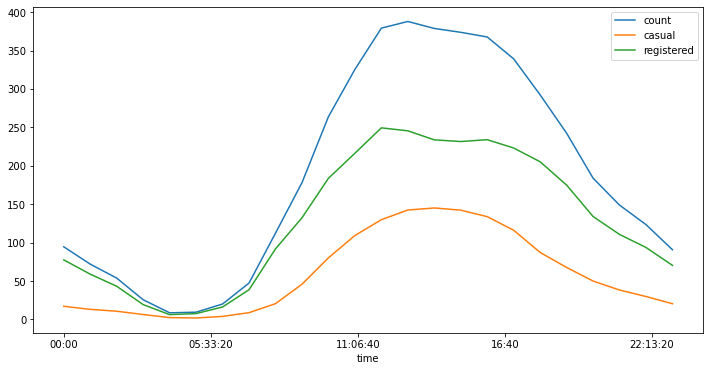

In [24]:
df.loc[df['workingday']==1].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)
df.loc[df['workingday']==0].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)


##### rentals(count,cas,reg)/time of day - holiday ?

C:\Users\maisa\AppData\Local\Temp/ipykernel_1492/1622604482.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.loc[df['holiday']==1].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)
C:\Users\maisa\AppData\Local\Temp/ipykernel_1492/1622604482.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.loc[df['holiday']==0].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)


<AxesSubplot:xlabel='time'>

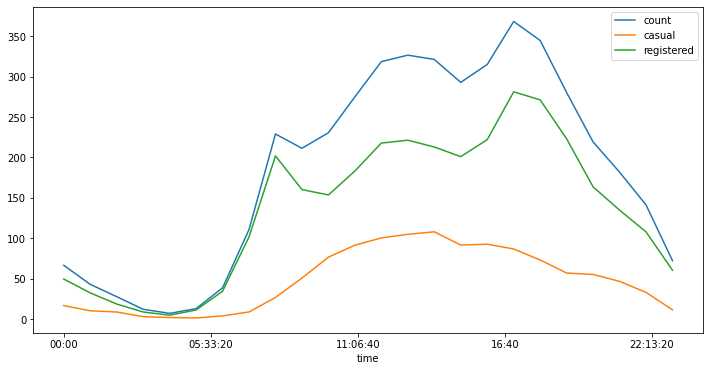

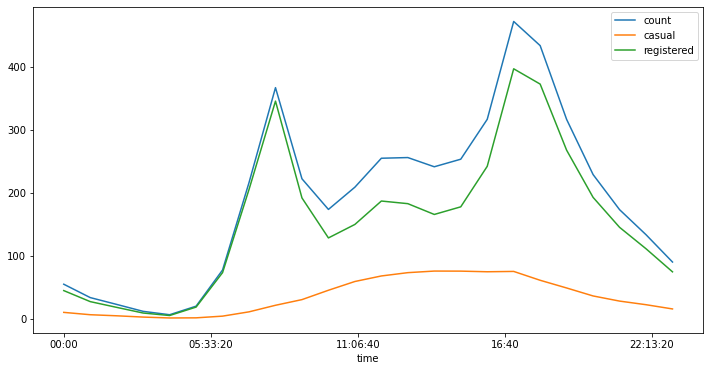

In [25]:
df.loc[df['holiday']==1].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)
df.loc[df['holiday']==0].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)

##### rentals(count,cas,reg)/time of day - Season

C:\Users\maisa\AppData\Local\Temp/ipykernel_1492/333778146.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.loc[df['season']==1].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)
C:\Users\maisa\AppData\Local\Temp/ipykernel_1492/333778146.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.loc[df['season']==2].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)
C:\Users\maisa\AppData\Local\Temp/ipykernel_1492/333778146.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.loc[df['season']==3].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)
C:\Users\maisa\AppData\Local\Temp/ipykernel_1492/333778146.py:4: FutureWarning: Indexing with multiple keys (implicitl

<AxesSubplot:xlabel='time'>

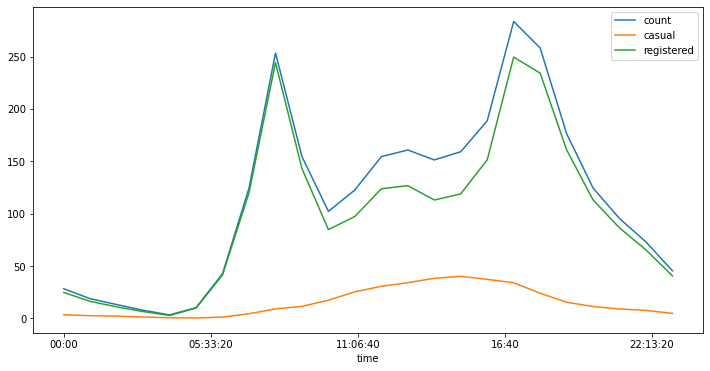

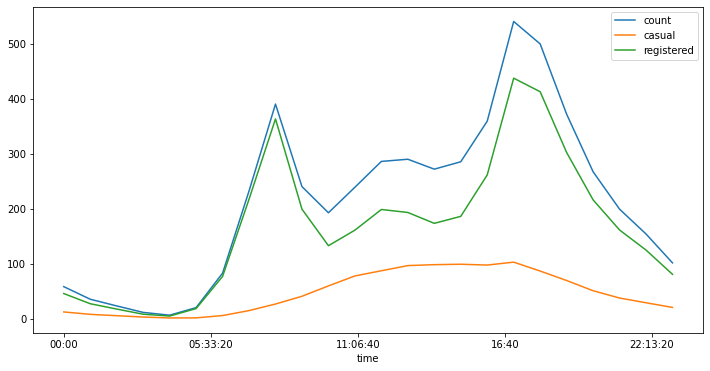

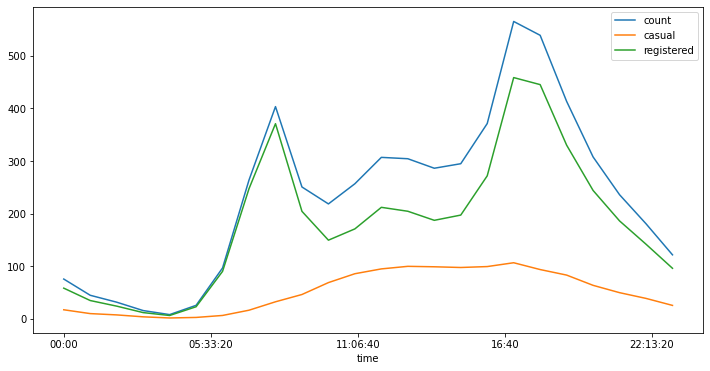

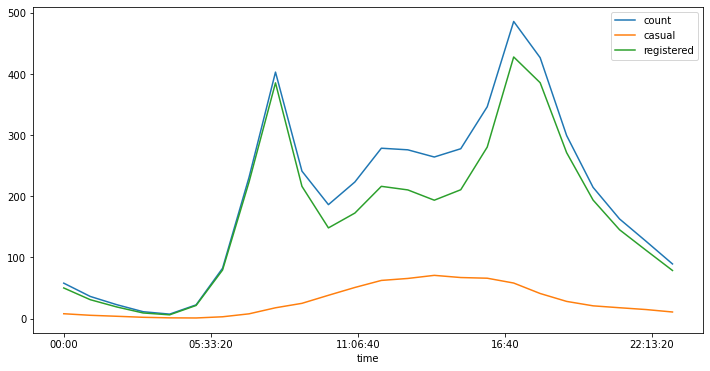

In [26]:
df.loc[df['season']==1].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)
df.loc[df['season']==2].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)
df.loc[df['season']==3].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)
df.loc[df['season']==4].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)

##### rentals(count,cas,reg)/time of day - weather

C:\Users\maisa\AppData\Local\Temp/ipykernel_1492/502501531.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.loc[df['weather']==1].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)
C:\Users\maisa\AppData\Local\Temp/ipykernel_1492/502501531.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.loc[df['weather']==2].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)
C:\Users\maisa\AppData\Local\Temp/ipykernel_1492/502501531.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.loc[df['weather']==3].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)


<AxesSubplot:xlabel='time'>

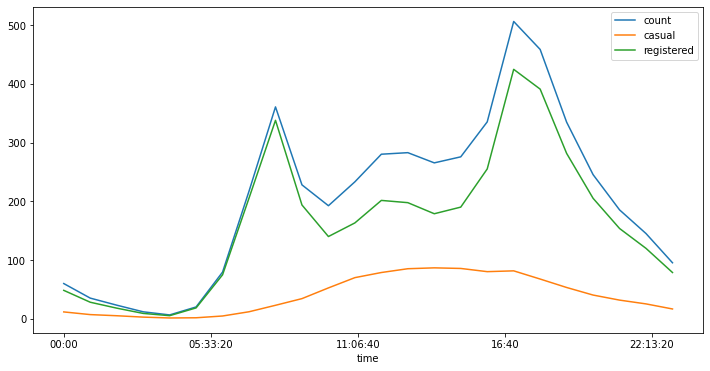

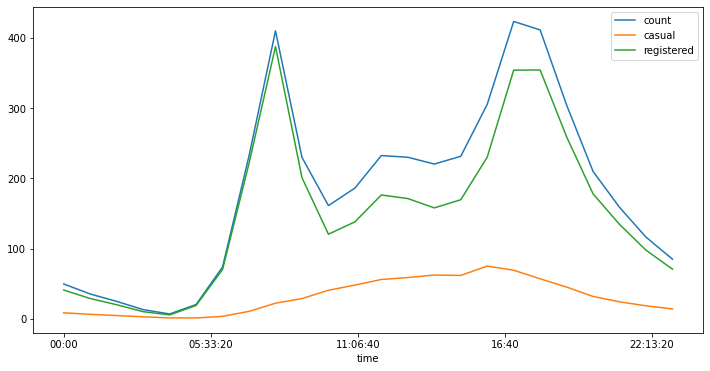

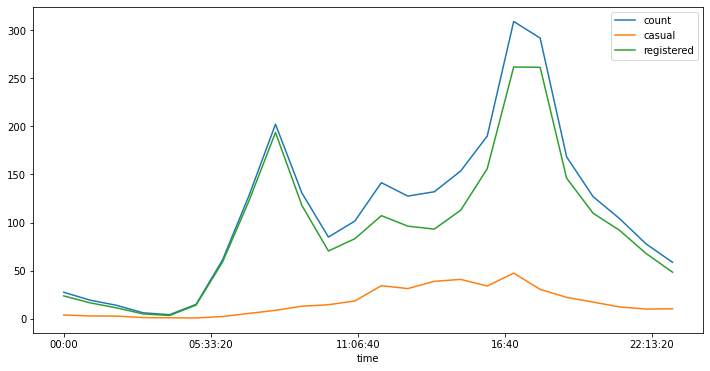

In [27]:
df.loc[df['weather']==1].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)
df.loc[df['weather']==2].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)
df.loc[df['weather']==3].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)
#df.loc[df['weather']==4].groupby(df['time'])['count', 'casual', 'registered'].mean().plot(legend=True)
# weather=4 only one observation

In [28]:
df.groupby(df['weather']).describe()


year                                                         \
          count         mean       std     min     25%     50%     75%   
weather                                                                  
1        7192.0  2011.501808  0.500031  2011.0  2011.0  2012.0  2012.0   
2        2834.0  2011.517996  0.499764  2011.0  2011.0  2012.0  2012.0   
3         859.0  2011.449360  0.497719  2011.0  2011.0  2011.0  2012.0   
4           1.0  2012.000000       NaN  2012.0  2012.0  2012.0  2012.0   

                 season            ... registered          count              \
            max   count      mean  ...        75%    max   count        mean   
weather                            ...                                         
1        2012.0  7192.0  2.497080  ...      236.0  886.0  7192.0  205.236791   
2        2012.0  2834.0  2.530346  ...      211.0  788.0  2834.0  178.955540   
3        2012.0   859.0  2.509895  ...      134.0  791.0   859.0  118.846333   
4        2012.0     1.0  1.000000  ...      158.0  158.0     1.0  164.000000   

                                                        
                std    min    25%    50%    75%    max  
weather                                                 
1        187.959566    1.0   48.0  161.0  305.0  977.0  
2        168.366413    1.0   41.0  134.0  264.0  890.0  
3        138.581297    1.0   23.0   71.0  161.0  891.0  
4               NaN  164.0  164.0  164.0  164.0  164.0  

[4 rows x 88 columns]

### Exploring Numeric Variables

##### rentals(count,cas,reg)/time of day - temp

In [29]:
df_hourly = df.groupby(df['time']).mean()


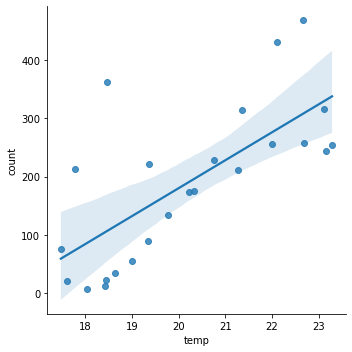

In [31]:
sns.lmplot(x='temp', y='count', data=df_hourly)


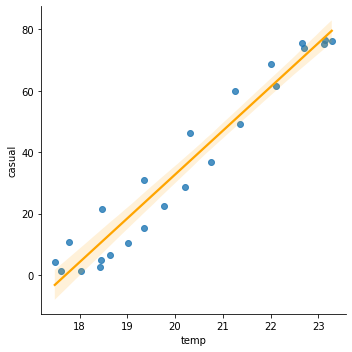

In [44]:
sns.lmplot(x='temp', y='casual', data=df_hourly, line_kws={'color': 'orange'})

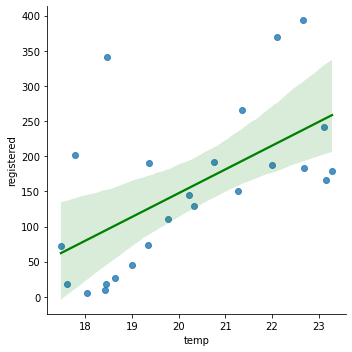

In [46]:
sns.lmplot(x='temp', y='registered', data=df_hourly, line_kws={'color': 'green'})

##### rentals(count,cas,reg)/time of day - humidity

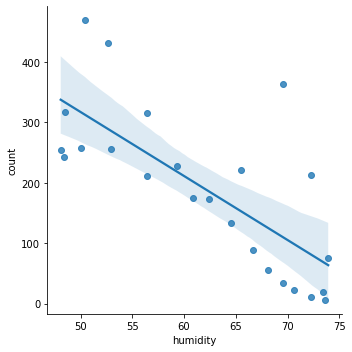

In [39]:
sns.lmplot(x='humidity', y='count', data=df_hourly)

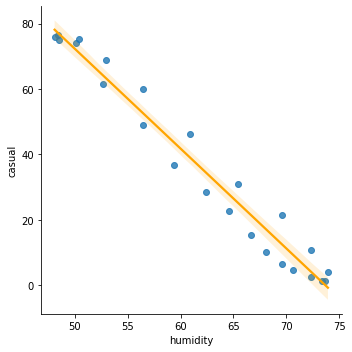

In [45]:
sns.lmplot(x='humidity', y='casual', data=df_hourly, line_kws={'color': 'orange'})

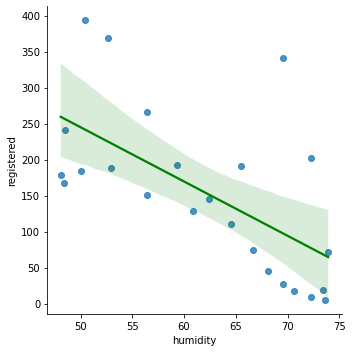

In [47]:
sns.lmplot(x='humidity', y='registered', data=df_hourly, line_kws={'color': 'green'})

##### rentals(count,cas,reg)/time of day - windspeed

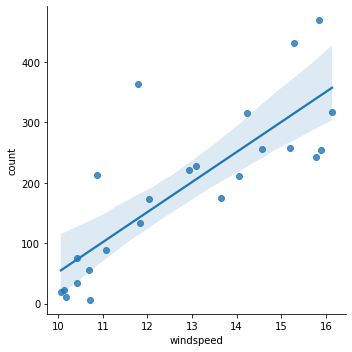

In [48]:
sns.lmplot(x='windspeed', y='count', data=df_hourly)

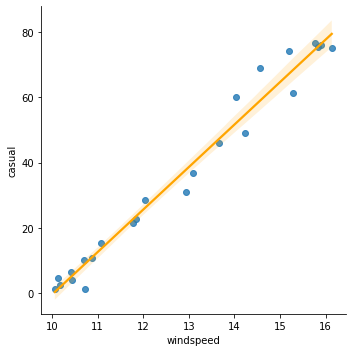

In [49]:
sns.lmplot(x='windspeed', y='casual', data=df_hourly, line_kws={'color': 'orange'})

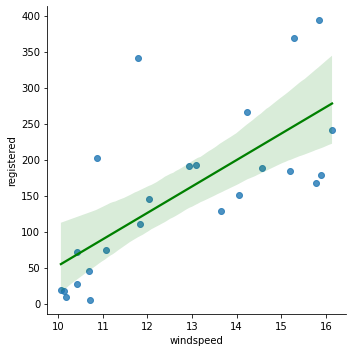

In [50]:
sns.lmplot(x='windspeed', y='registered', data=df_hourly, line_kws={'color': 'green'})